In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Space_Corrected.csv")
df

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [3]:
df.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [5]:
df["Country"]=df['Location'].str.split(",").str[-1]


In [6]:
df=df.drop(["Unnamed: 0", "Unnamed: 0.1"],axis=1)
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan


In [7]:

df['Launch_time']=df['Datum'].str.split(",").str[-1]
df['Launch_date']=df['Datum'].str.split(", ").str[-2]


In [8]:
df['day']=df['Launch_date'].str.split().str[0]
df['month']=df['Launch_date'].str.split().str[1]
df['year']=df['Launch_time'].str.split().str[0]


In [9]:
df['time']=df['Launch_time'].str.split().str[1]


In [10]:
df['Launch_hour']=pd.to_datetime(df.time).dt.hour
df['Launch_minute']=pd.to_datetime(df.time).dt.minute
df=df.drop(['Datum', 'Launch_time', 'Launch_date', 'time'], axis=1)


In [11]:
df['Launch_hour'].fillna(df['Launch_hour'].mean(), inplace=True)
df['Launch_minute'].fillna(df['Launch_minute'].mean(), inplace=True)

In [12]:
df['satellite_name']=df['Detail'].str.split('|').str[1]
df['Satellite_name']=df['satellite_name'].str.split('&').str[0]
df['Launch_system']=df['Detail'].str.split('|').str[0]


In [13]:
df=df.drop([' Rocket', 'Location','Detail','satellite_name'], axis=1)
df.head(5)

,Company Name,Status Rocket,Status Mission,Country,day,month,year,Launch_hour,Launch_minute,Satellite_name,Launch_system
0,SpaceX,StatusActive,Success,USA,Fri,Aug,2020,5.0,12.0,Starlink V1 L9,Falcon 9 Block 5
1,CASC,StatusActive,Success,China,Thu,Aug,2020,4.0,1.0,Gaofen-9 04,Long March 2D
2,SpaceX,StatusActive,Success,USA,Tue,Aug,2020,23.0,57.0,150 Meter Hop,Starship Prototype
3,Roscosmos,StatusActive,Success,Kazakhstan,Thu,Jul,2020,21.0,25.0,Ekspress-80,Proton-M/Briz-M
4,ULA,StatusActive,Success,USA,Thu,Jul,2020,11.0,50.0,Perseverance,Atlas V 541


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    4324 non-null   object 
 1   Status Rocket   4324 non-null   object 
 2   Status Mission  4324 non-null   object 
 3   Country         4324 non-null   object 
 4   day             4324 non-null   object 
 5   month           4324 non-null   object 
 6   year            4324 non-null   object 
 7   Launch_hour     4324 non-null   float64
 8   Launch_minute   4324 non-null   float64
 9   Satellite_name  4324 non-null   object 
 10  Launch_system   4324 non-null   object 
dtypes: float64(2), object(9)
memory usage: 371.7+ KB


In [15]:
df['Satellite_name'].value_counts()[:10]

 DSP                8
 KH-9               8
 BOR-5 Shuttle      6
 KH-11              6
 Demo Flight        6
 Osumi              5
 KH-9               5
 BOR-2 Shuttle      4
 Zond               4
 Unknown Payload    4
Name: Satellite_name, dtype: int64

In [16]:
df['Satellite_name1']=df['Satellite_name'].str.split(',').str[0]


In [17]:
df=df.drop(["Satellite_name"], axis=1)
df

,Company Name,Status Rocket,Status Mission,Country,day,month,year,Launch_hour,Launch_minute,Launch_system,Satellite_name1
0,SpaceX,StatusActive,Success,USA,Fri,Aug,2020,5.0,12.0,Falcon 9 Block 5,Starlink V1 L9
1,CASC,StatusActive,Success,China,Thu,Aug,2020,4.0,1.0,Long March 2D,Gaofen-9 04
2,SpaceX,StatusActive,Success,USA,Tue,Aug,2020,23.0,57.0,Starship Prototype,150 Meter Hop
3,Roscosmos,StatusActive,Success,Kazakhstan,Thu,Jul,2020,21.0,25.0,Proton-M/Briz-M,Ekspress-80
4,ULA,StatusActive,Success,USA,Thu,Jul,2020,11.0,50.0,Atlas V 541,Perseverance
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,StatusRetired,Failure,USA,Wed,Feb,1958,7.0,33.0,Vanguard,Vanguard TV3BU
4320,AMBA,StatusRetired,Success,USA,Sat,Feb,1958,3.0,48.0,Juno I,Explorer 1
4321,US Navy,StatusRetired,Failure,USA,Fri,Dec,1957,16.0,44.0,Vanguard,Vanguard TV3
4322,RVSN USSR,StatusRetired,Success,Kazakhstan,Sun,Nov,1957,2.0,30.0,Sputnik 8K71PS,Sputnik-2


In [18]:
print(list(df['Status Mission'].value_counts().keys()))

['Success', 'Failure', 'Partial Failure', 'Prelaunch Failure']


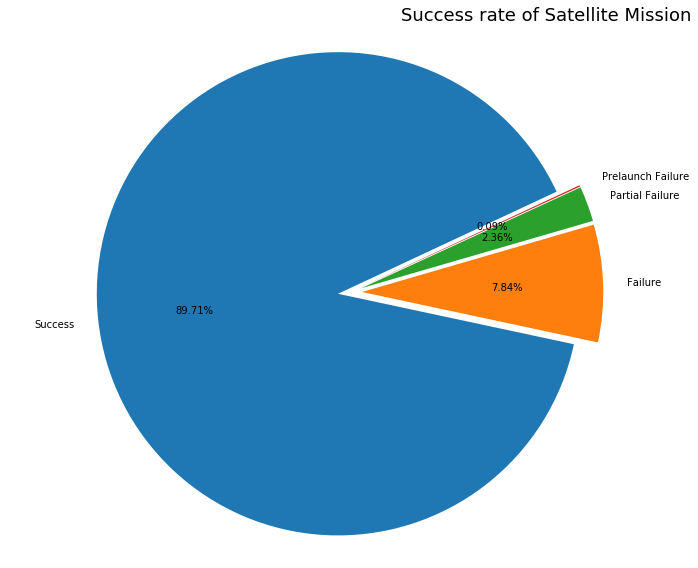

In [19]:
# status of rocket Mission
labels=list(df["Status Mission"].value_counts().keys())
sizes=df["Status Mission"].value_counts()
explode=[]
for i in labels:
    explode.append(0.05)
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,explode=explode, autopct='%1.2f%%', startangle=25, shadow=False)
plt.title("Success rate of Satellite Mission", fontsize=18, loc="right")
plt.axis("equal")
plt.tight_layout()

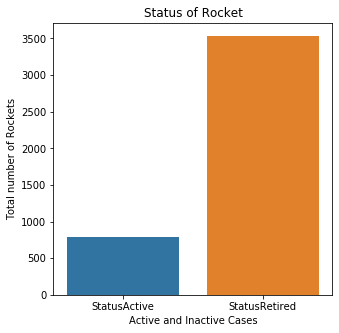

In [20]:
#Status of Rocket
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Status Rocket', data=df)
ax.set_title("Status of Rocket")
ax.set_xlabel("Active and Inactive Cases")
ax.set_ylabel("Total number of Rockets")
plt.show()

In [21]:
df["Country"].value_counts()

 Russia                            1395
 USA                               1344
 Kazakhstan                         701
 France                             303
 China                              268
 Japan                              126
 India                               76
 Pacific Ocean                       36
 New Zealand                         13
 Iran                                13
 Israel                              11
 Kenya                                9
 Australia                            6
 North Korea                          5
 New Mexico                           4
 Barents Sea                          3
 Brazil                               3
 South Korea                          3
 Gran Canaria                         2
 Pacific Missile Range Facility       1
 Shahrud Missile Test Site            1
 Yellow Sea                           1
Name: Country, dtype: int64


 Top 11 Countries in Satellite Mission:

  Russia           1395
 USA              1344
 Kazakhstan        701
 France            303
 China             268
 Japan             126
 India              76
 Pacific Ocean      36
 New Zealand        13
 Iran               13
 Israel             11
Name: Country, dtype: int64


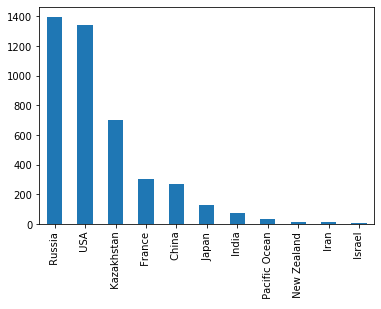

In [22]:
df["Country"].value_counts()[:11].plot.bar()
print("\n Top 11 Countries in Satellite Mission:\n\n", df["Country"].value_counts()[:11])

Top 20 Companies in Satellite Mission: 
 RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Name: Company Name, dtype: int64


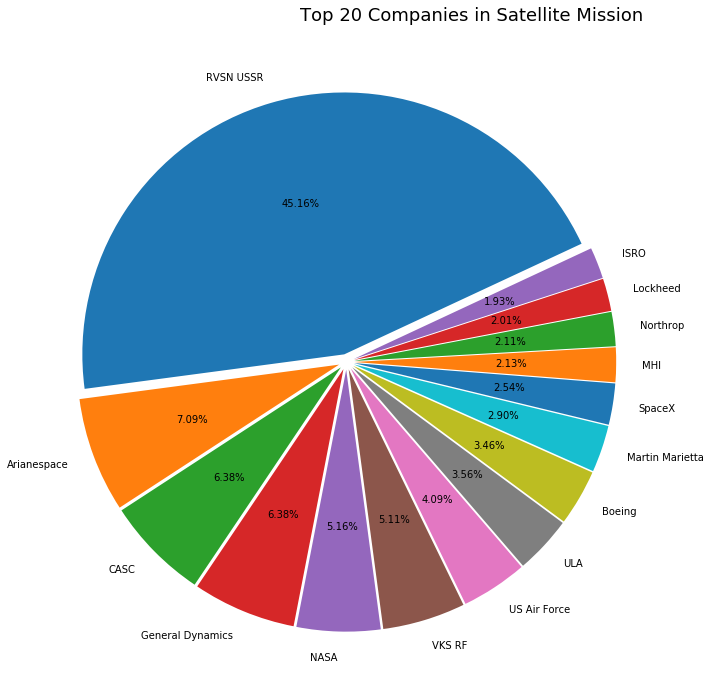

In [23]:
labels=list(df["Company Name"].value_counts()[:15].keys())
sizes=df["Company Name"].value_counts()[:15]
explode=[]
for i in labels:
    explode.append(0.03)
plt.figure(figsize=(10,10))
plt.pie(sizes,labels=labels,explode=explode, autopct='%1.2f%%', startangle=25, shadow=False)
plt.title("Top 20 Companies in Satellite Mission", fontsize=18, loc="right")
plt.axis("equal")
plt.tight_layout()
print("Top 20 Companies in Satellite Mission: \n", format(df["Company Name"].value_counts()[:15]))

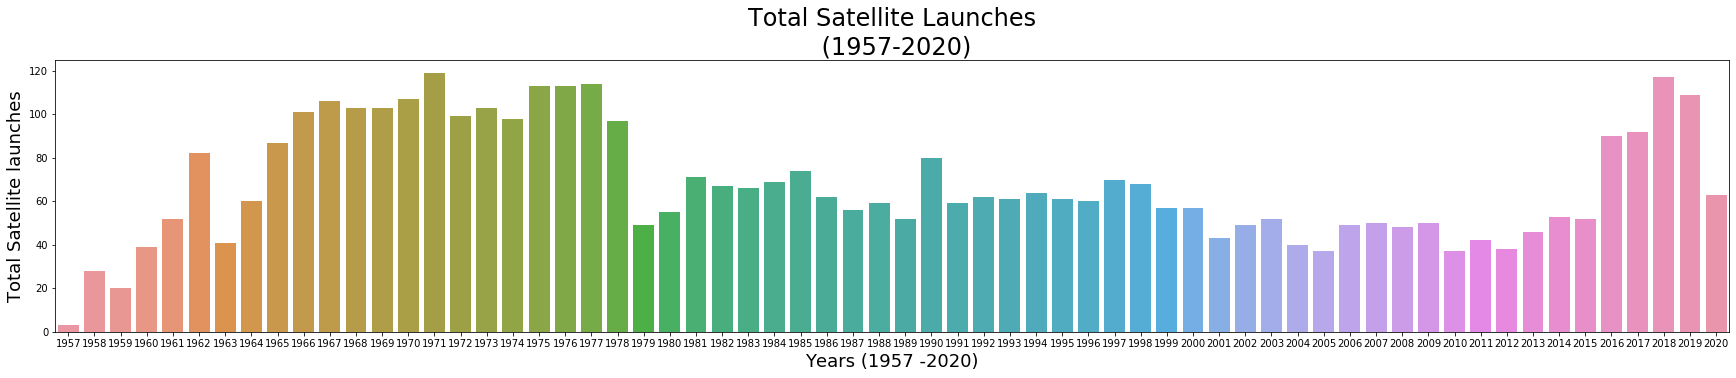

In [24]:
plt.figure(figsize=(30,5))
ax=sns.countplot(x="year", data=df)
ax.set_title("Total Satellite Launches\n (1957-2020)", fontsize=24)
ax.set_xlabel("Years (1957 -2020)", fontsize=18)
ax.set_ylabel("Total Satellite launches", fontsize=18)
plt.show()

In [25]:
df["year"].value_counts()[:20]

1971    119
2018    117
1977    114
1975    113
1976    113
2019    109
1970    107
1967    106
1968    103
1969    103
1973    103
1966    101
1972     99
1974     98
1978     97
2017     92
2016     90
1965     87
1962     82
1990     80
Name: year, dtype: int64

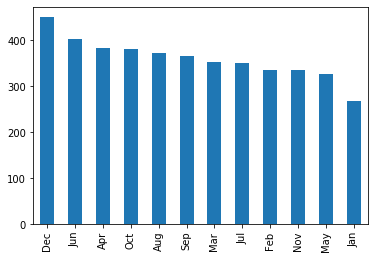

In [26]:
df.month.value_counts().plot.bar()

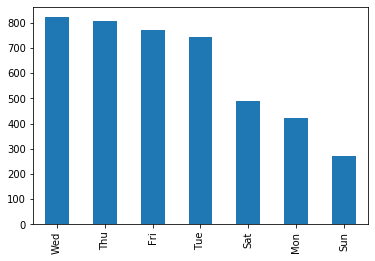

In [27]:
df.day.value_counts().plot.bar()